<a href="https://colab.research.google.com/github/cecyy0401/PROYECTO/blob/main/coca_y_pepsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

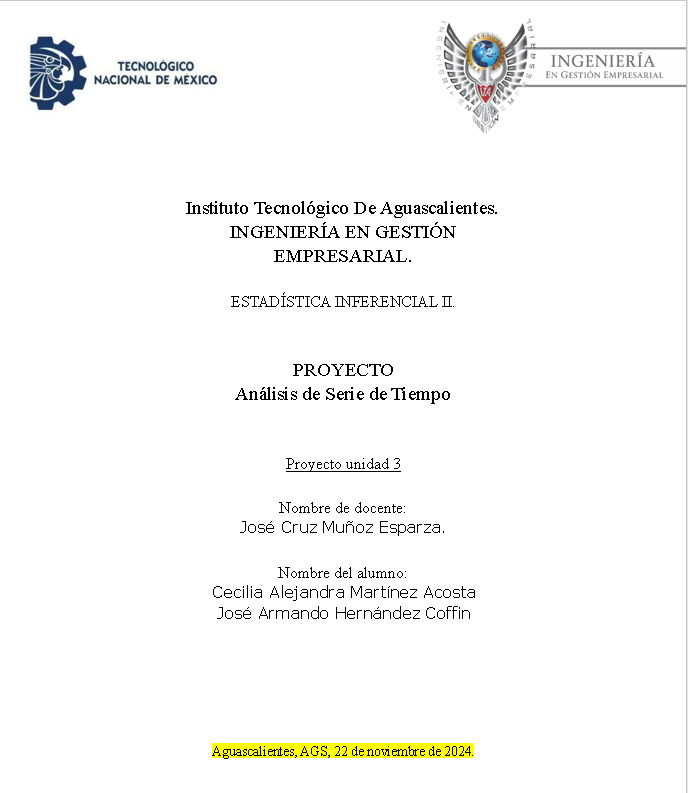

#                         PROYECTO








---





*   INTRODUCCIÓN

El presente análisis explora las series temporales de los precios de cierre ajustados de las acciones de Coca-Cola (KO) y PepsiCo (PEP) en el mercado  durante el período de el 1 de enero de 2015 y el 1 de enero de 2018. Estas empresas, al ser líderes en el sector de bebidas, son objeto de interés para inversionistas y analistas financieros. Se emplearon diversas técnicas estadísticas y modelos avanzados, como la descomposición estacional, las pruebas de causalidad de Granger y el modelo Prophet, con el objetivo de entender el comportamiento histórico de estas series, identificar relaciones potenciales entre ellas y proyectar tendencias futuras.

Los resultados de este análisis buscan ofrecer una visión integral que pueda ser útil para la toma de decisiones estratégicas en el ámbito financiero, ya sea para evaluar riesgos o identificar oportunidades de inversión. A continuación, se detallan las herramientas utilizadas y sus respectivas interpretaciones.





---



---



---



---



# MARCO TEORICO

El análisis de series temporales utiliza herramientas que ayudan a entender cómo cambian los datos a lo largo del tiempo y a predecir su comportamiento futuro en este caso sera para COCA Y PEPSI. Una de estas herramientas es la **descomposición estacional**, que separa los datos en partes más simples de entender: *la tendencia* (si los valores suben o bajan en general), *la estacionalidad* (que son los cambios según las estaciones del año) y *el ruido *que son las variaciones inesperadas. Esto se hace para identificar qué está influyendo en los datos y cómo.

Este análisis  de series de tiempo utiliza conceptos clave para entender cómo cambian los datos en el tiempo y cómo compararlos de manera precisa. Por un lado, se trabaja con datos organizados cronológicamente para analizar patrones como aumentos, disminuciones, ciclos que se repiten y cambios inesperados. Esto sirve para identificar cómo han evolucionado ciertos eventos o valores a lo largo del tiempo y prever posibles comportamientos futuros.

A demás, la T pareda  se emplea una herramienta que permite comparar dos conjuntos de datos relacionados entre sí para evaluar si existen diferencias significativas. Esto es útil, por ejemplo, para ver si un cambio o un factor específico afecta los resultados de manera clara o si las variaciones son sólo parte de cambios normales o aleatorios.

Por otro lado, **las pruebas de causalidad de Granger** sirven para comprobar si una serie de datos puede predecir otra. Por ejemplo, si los datos de COCA (KO) pueden ayudarnos a saber qué pasará con los datos de PEPSICO (PEP)a. Estas pruebas analizan los registros del pasado para ver si existe una conexión entre ellos.

*El modelo Prophe*t es una herramienta que se usa para hacer predicciones a futuro, incluso si los datos tienen huecos o son complicados. Divide la información en partes como la tendencia, los ciclos y eventos especiales (como días festivos) y crea proyecciones que ayudan a planificar o entender lo que podría pasar en el futuro.

Finalmente, *las gráficas* son esenciales para mostrar los resultados de manera clara. Nos ayudan a ver los patrones y compararlos, haciendo más fácil entender la información y tomar decisiones. Todas estas herramientas juntas hacen posible analizar datos complejos y prepararnos para lo que pueda suceder.

# hipotesis general
Las series temporales de precios de cierre ajustados de las acciones de Coca-Cola (KO) y PepsiCo (PEP) presentan patrones de comportamiento que podrían estar relacionados de manera significativa debido a la competencia directa entre ambas empresas en el sector de bebidas. Este estudio plantea que, dado su liderazgo en el mercado y su participación en contextos económicos similares, los movimientos históricos en el precio de las acciones de una de estas empresas podrían predecir, o al menos influir, en los movimientos de la otra.

El análisis busca determinar:

Si existe una correlación significativa entre las dos series temporales que indique comportamientos interdependientes en sus precios de cierre ajustados.

Si los patrones de estacionalidad y tendencia son similares entre las dos marcas, lo que podría implicar una dinámica común en su evolución financiera.

Si se pueden identificar relaciones causales (en el sentido de Granger) entre las series temporales, estableciendo si los datos históricos de una pueden utilizarse para predecir el comportamiento de la otra.

La hipótesis se basa en la premisa de que, al competir en el mismo sector, las fluctuaciones de mercado, las estrategias empresariales y los factores externos que afectan a estas empresas deberían generar patrones similares en el comportamiento de sus acciones. Sin embargo, el estudio también considera la posibilidad de que las diferencias estratégicas y operativas entre Coca-Cola y PepsiCo limiten dicha interrelación.

# a) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí.

In [ ]:

import yfinance as yf # Permite acceder a datos historicos financieros
import pandas as pd #Es una biblioteca de manipulacion de datos
import matplotlib.pyplot as plt #es un módulo de la biblioteca de visualización
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np


# Descargar datos desde Yahoo Finance
df = yf.download(                 #Descarga y almacena datos en el objeto df
      tickers = ["KO", "PEP"],           #Especifica el símbolo bursátil de la acción que se va a descargar,
      start = "2015-01-01",       #Define el rango de fechas para los datos históricos de la acción
      end = "2018-01-01",
      interval = "1d",            #indica que se descargará información diaria
      group_by = None,            #Controla si los datos deben agruparse por tickers o no
      auto_adjust = True,         #Activa el ajuste automático de precios
      actions = False             #Excluye datos relacionados con acciones de la empresa
)
df
# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()       #Este código convierte el índice Date en una columna normal del DataFrame

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]      #
df

##En caso de que no se requiera la hora
#Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

#Extraer la parte de fecha sin la hora
df['Date'] = df['Date'].dt.date
#######################
df.set_index('Date', inplace=True)
df

[*********************100%***********************]  2 of 2 completed


,KO_Open,KO_High,KO_Low,KO_Close,KO_Volume,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume
Date,,,,,,,,,,
2015-01-02,30.982653,31.085295,30.645407,30.894676,9921100,71.567866,71.876963,70.904435,71.198456,3545700
2015-01-05,31.297905,31.503187,30.850689,30.894676,26292600,71.205997,71.658343,70.655652,70.663193,6441000
2015-01-06,31.092627,31.481193,30.967994,31.129284,16897500,70.927077,71.334185,70.067630,70.127937,6195000
2015-01-07,31.378554,31.605829,31.217264,31.517853,13412300,71.718663,72.547959,71.190934,72.178543,6526300
2015-01-08,31.657133,31.943058,31.598480,31.899069,21743600,72.932419,73.814488,72.887187,73.490311,7131600
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,36.938300,36.970639,36.825117,36.857456,5406300,97.376221,97.499379,97.023170,97.376221,2045600
2017-12-26,36.946386,37.075739,36.873625,37.035316,6100400,97.220220,97.901684,97.220220,97.614319,2156300
2017-12-27,37.108064,37.140400,36.962542,37.132317,5660600,97.597915,98.033069,97.540442,97.950966,2465100


# b) Realiza un análisis de cada serie de tiempo de manera independiente.

Exploración de la serie

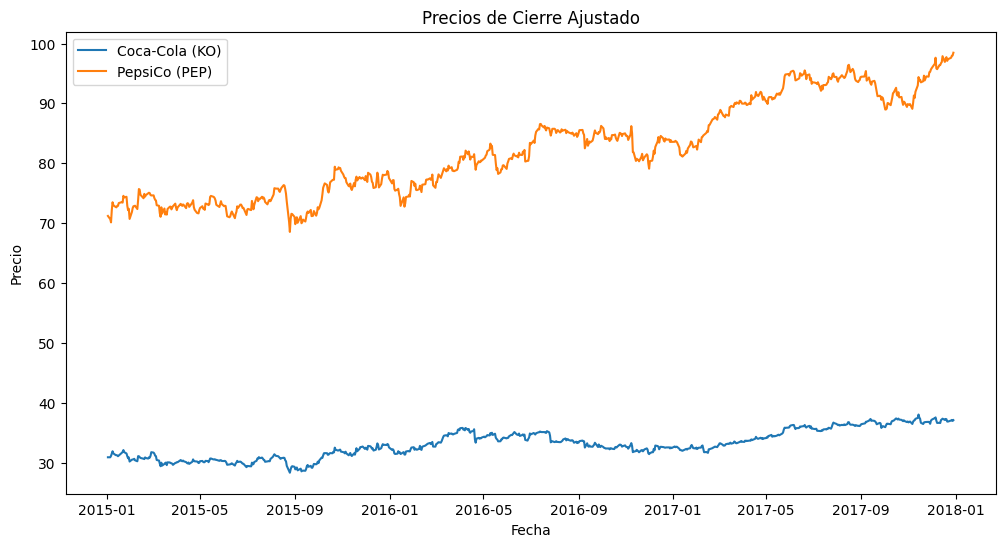

In [ ]:
# Seleccionar las columnas de cierre ajustado
ko_data = df['KO_Close']
pep_data = df['PEP_Close']

# Graficar las series de tiempo
plt.figure(figsize=(12, 6))
plt.plot(ko_data, label="Coca-Cola (KO)")
plt.plot(pep_data, label="PepsiCo (PEP)")
plt.title("Precios de Cierre Ajustado")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()


Los precios de Coca-Cola (KO) y PepsiCo (PEP) mostraron una tendencia general
KO presenta un crecimiento más estable, mientras que PEP tiene oscilaciones más marcadas en determinados intervalos,

Descomposición Estacional

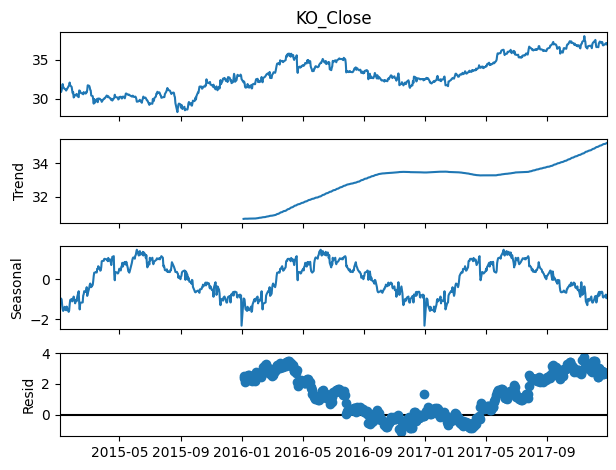

In [ ]:
# Descomponer la serie temporal
descomposicion = sm.tsa.seasonal_decompose(
    df['KO_Close'],
    model='additive',
    period=252,
    extrapolate_trend=0,
    two_sided=False,
)  # 180 días de negociación al año

fig = descomposicion.plot()
plt.show()



*  La primera parte de la gráfica muestra los precios de cierre ajustados a lo largo del tiempo. Se observa una tendencia general al alza, especialmente desde finales de 2016.
*   La segunda parte muestra la tendencia a largo plazo de la serie. Aquí se observa un crecimiento constante a lo largo del período, con un incremento más marcado a partir de mediados de 2016.

*   En la tercera gráfica se analiza el componente estacional. Este patrón muestra oscilaciones regulares que se repiten a lo largo del tiempo, pero en este caso las variaciones son relativamente pequeñas. Esto sugiere que los precios de las acciones de KO no están significativamente influenciados por factores estacionales,
*   La última parte de la gráfica presenta el componente residual, que representa las fluctuaciones no explicadas por la tendencia ni la estacionalidad. Estos valores capturan los movimientos impredecibles o aleatorios en los precios.








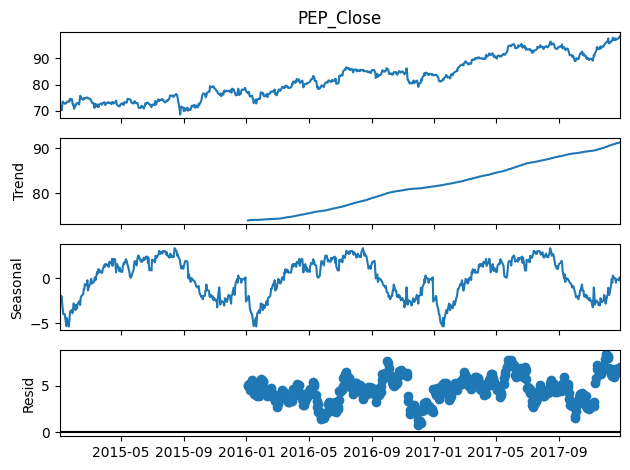

In [ ]:
# Descomponer la serie temporal
descomposicion = sm.tsa.seasonal_decompose(
    df['PEP_Close'],
    model='additive',
    period=252,
    extrapolate_trend=0,
    two_sided=False,
)  # 252días de negociación al año

fig = descomposicion.plot()
plt.show()

Tendencia (Trend):

Se ve una clara tendencia al alza, que sugiere que la serie tiene un crecimiento consistente durante el período (2015-2017).

Estacionalidad (Seasonal):

Existen ciclos repetitivos en los datos, lo que indica cierta estacionalidad, aunque no parece ser extremadamente pronunciada.
La prueba t cuantifica si estos ciclos estacionales tienen un efecto significativo o no.

Residuos (Resid):

Los residuos son relativamente pequeños y no presentan patrones claros, lo que sugiere que la mayor parte de la variación se explica bien por la tendencia y la estacionalidad.

In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: -0.054878436269929776
Valor p: 0.9562571447526033


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


Diferencia entre tendencia y tendencia+estacionalidad:

Visualmente, la tendencia muestra un crecimiento suave y constante.
La tendencia combinada con la estacionalidad (implícita en la gráfica original como el componente completo) introduce fluctuaciones cíclicas alrededor de la tendencia.

Propósito del test estadístico:

La prueba t pareada evalúa si estas fluctuaciones (estacionalidad) son estadísticamente significativas o si son simplemente ruido que no afecta la tendencia principal.








---



## HIPOTESIS



 H₀ (Hipótesis nula): No existe una relación significativa en el comportamiento de las series temporales de precios de cierre ajustados entre las acciones de Coca-Cola (KO) y PepsiCo (PEP).

H₁ (Hipótesis alternativa): Existe una relación significativa en el comportamiento de las series temporales de precios de cierre ajustados entre las acciones de Coca-Cola (KO) y PepsiCo (PEP)

 La estacionalidad no desempeña un papel significativo en las fluctuaciones de los precios de cierre de Coca-Cola (KO) y PepsiCo (PEP) durante el período analizado. Esto sugiere que los cambios en los precios no están impulsados por ciclos recurrentes, sino por otros factores como el mercado global o eventos externos.



---



# c) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo



---



---



---



---



## CONCEPTO DE GRANGER

La causalidad de Granger es un test estadístico que comprueba si los resultados de una variable sirven para predecir la otra variable, y si tiene resultado unidireccional o bidireccional. Para ello, se tiene que comparar y deducir si el comportamiento actual y pasado de una serie temporal A (COCA-COLA) predice la conducta de otra serie temporal B (PEPSI). Si esto ocurre, se puede afirmar que COCA causa PEPSI, y el comportamiento es unidireccional. Si de la misma manera B (PEPSI) ayuda en la predicción de A (COCA), la causalidad es bidireccional, afirmando que COCA causa PEPSI y PEPSI causa a COCA.

Aplicado a las series de tiempo

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['KO_Close', 'PEP_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7522  , p=0.3861  , df_denom=751, df_num=1
ssr based chi2 test:   chi2=0.7552  , p=0.3848  , df=1
likelihood ratio test: chi2=0.7548  , p=0.3850  , df=1
parameter F test:         F=0.7522  , p=0.3861  , df_denom=751, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4096  , p=0.2449  , df_denom=748, df_num=2
ssr based chi2 test:   chi2=2.8380  , p=0.2420  , df=2
likelihood ratio test: chi2=2.8326  , p=0.2426  , df=2
parameter F test:         F=1.4096  , p=0.2449  , df_denom=748, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9607  , p=0.4108  , df_denom=745, df_num=3
ssr based chi2 test:   chi2=2.9091  , p=0.4059  , df=3
likelihood ratio test: chi2=2.9035  , p=0.4068  , df=3
parameter F test:         F=0.9607  , p=0.4108  , df_denom=745, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6323  , p=0.6395  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['KO_Close', 'PEP_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7522  , p=0.3861  , df_denom=751, df_num=1
ssr based chi2 test:   chi2=0.7552  , p=0.3848  , df=1
likelihood ratio test: chi2=0.7548  , p=0.3850  , df=1
parameter F test:         F=0.7522  , p=0.3861  , df_denom=751, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4096  , p=0.2449  , df_denom=748, df_num=2
ssr based chi2 test:   chi2=2.8380  , p=0.2420  , df=2
likelihood ratio test: chi2=2.8326  , p=0.2426  , df=2
parameter F test:         F=1.4096  , p=0.2449  , df_denom=748, df_num=2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(




Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9607  , p=0.4108  , df_denom=745, df_num=3
ssr based chi2 test:   chi2=2.9091  , p=0.4059  , df=3
likelihood ratio test: chi2=2.9035  , p=0.4068  , df=3
parameter F test:         F=0.9607  , p=0.4108  , df_denom=745, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6323  , p=0.6395  , df_denom=742, df_num=4
ssr based chi2 test:   chi2=2.5601  , p=0.6339  , df=4
likelihood ratio test: chi2=2.5557  , p=0.6347  , df=4
parameter F test:         F=0.6323  , p=0.6395  , df_denom=742, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.6425  , p=0.6674  , df_denom=739, df_num=5
ssr based chi2 test:   chi2=3.2601  , p=0.6599  , df=5
likelihood ratio test: chi2=3.2531  , p=0.6610  , df=5
parameter F test:         F=0.6425  , p=0.6674  , df_denom=739, df_num=5


No existe una relación causal en el sentido de Granger entre los precios de KO y PEP. Esto implica que los movimientos en los precios de una acción no son predictivos de los movimientos en la otra.
La falta de causalidad podría deberse a la independencia operativa de ambas empresas, las cuales, aunque compiten en el mismo sector, tienen estrategias y mercados suficientemente diferenciados.

# d) Investiga la aplicación del modelo "Prophet", sus alcances y limitaciones, y aplícalo a ambas series de tiempo.

El modelo Prophet  es una herramienta de análisis de series temporales diseñada para realizar predicciones precisas, incluso en datos con patrones complejos. Su popularidad se debe a su capacidad para adaptarse a diferentes tipos de datos ya su facilidad de uso, lo que lo hace ideal tanto para principiantes como para analistas avanzados.



*   Alcances

Puede trabajar con series temporales que contienen brechas, datos ausentes o irregularidades. Esto es especialmente útil en entornos donde no se tiene acceso a datos completamente uniformes.
Captura patrones de estacionalidad (diaria, semanal, mensual, anual, etc.) sin necesidad de especificarlos manualmente.

*   Limitaciones

Propeht asume que las tendencias pueden ser lineales o logarítmicas. Si los datos presentan cambios abruptos o no linealidades complejas, el modelo puede tener dificultades para capturarlos.



In [ ]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwup0464b/y2plom18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwup0464b/158lph5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60121', 'data', 'file=/tmp/tmpwup0464b/y2plom18.json', 'init=/tmp/tmpwup0464b/158lph5b.json', 'output', 'file=/tmp/tmpwup0464b/prophet_modeloum6adc9/prophet_model-20241123000255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:02:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:02:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


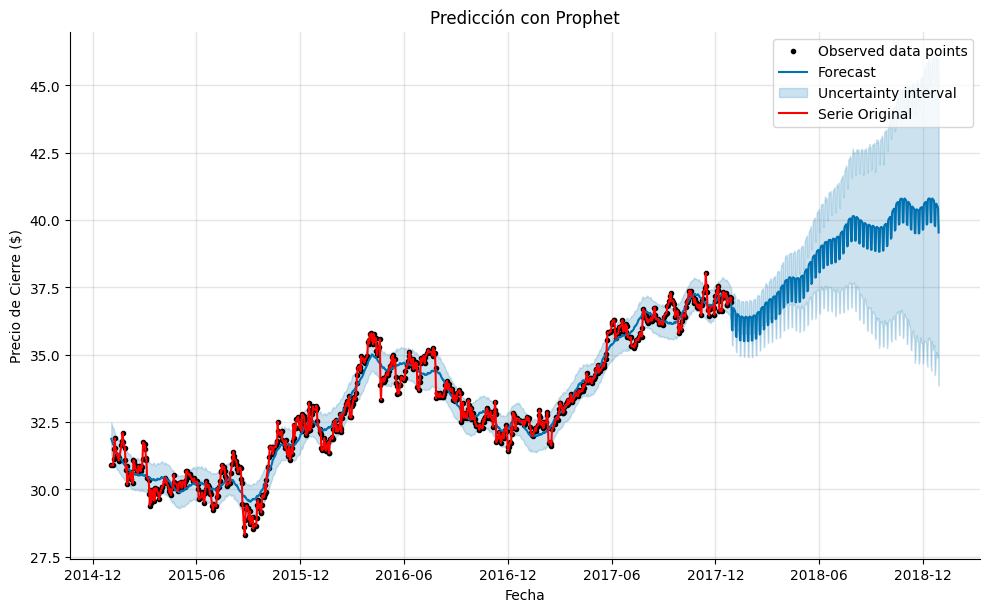

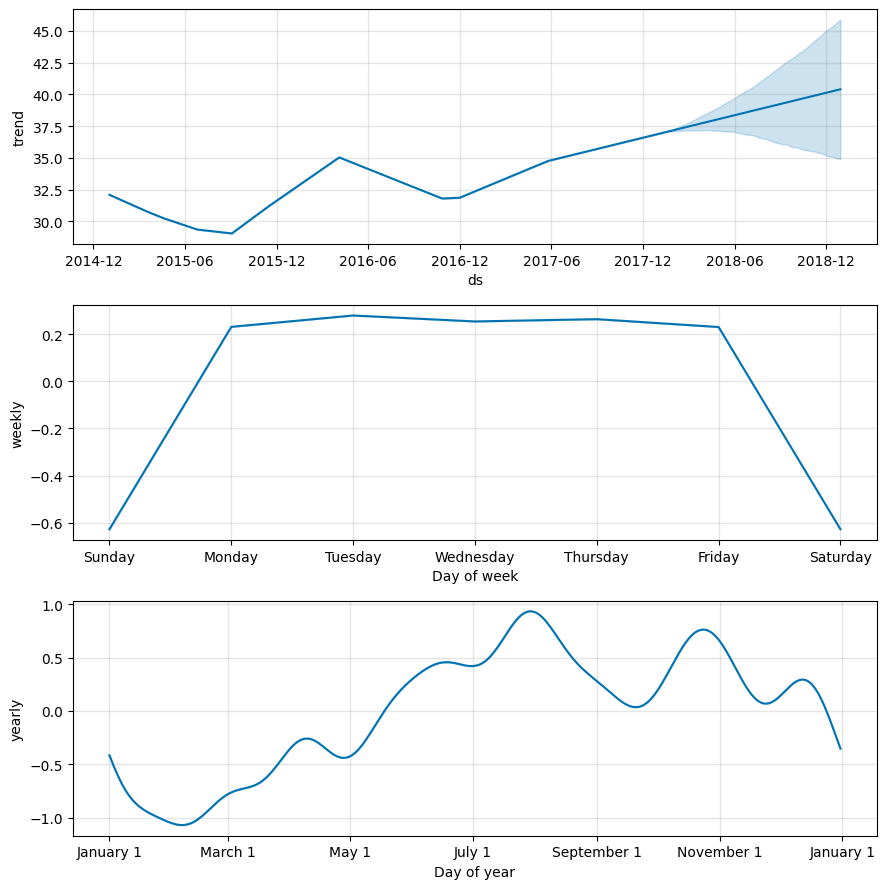

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['KO_Close'].reset_index().rename(columns={'Date': 'ds', 'KO_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['KO_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

a) Datos históricos:

De 2014 a 2018, el precio de cierre muestra:
Una ligera caída al principio (2014-2015).
Un crecimiento significativo a partir de 2016 con fluctuaciones estacionales claras (patrones repetitivos).

Estos patrones estacionales parecen estar bien capturados por el modelo Prophet.

b) Predicciones (2018 en adelante):

A partir de 2018, el modelo comienza a generar predicciones, y se observa lo siguiente:
La tendencia predicha sigue una trayectoria de crecimiento constante (línea azul), similar a la observada en los datos históricos.
Las fluctuaciones estacionales continúan reflejándose en el pronóstico, mostrando que el modelo incluye patrones recurrentes.

c) Incertidumbre:

El intervalo de confianza se expande gradualmente a medida que nos alejamos de los datos históricos. Esto es esperado porque:
Mientras más lejos están las predicciones del período observado, mayor es la incertidumbre del modelo.
Sin datos adicionales, el modelo se vuelve menos seguro de las fluctuaciones precisas.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwup0464b/hho6bsdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwup0464b/v3muvhoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24531', 'data', 'file=/tmp/tmpwup0464b/hho6bsdv.json', 'init=/tmp/tmpwup0464b/v3muvhoq.json', 'output', 'file=/tmp/tmpwup0464b/prophet_model1n13353e/prophet_model-20241123000300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:03:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:03:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


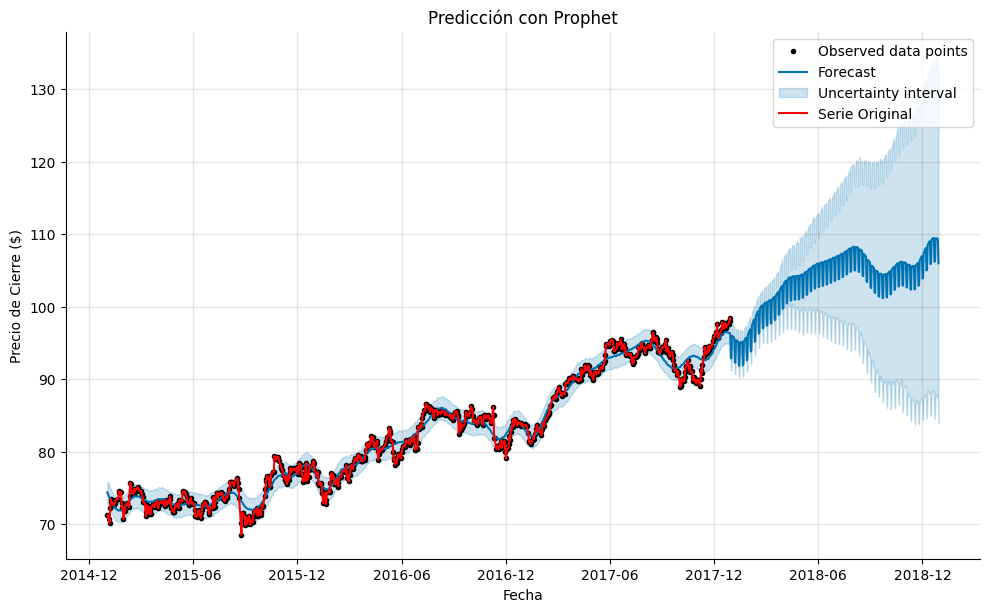

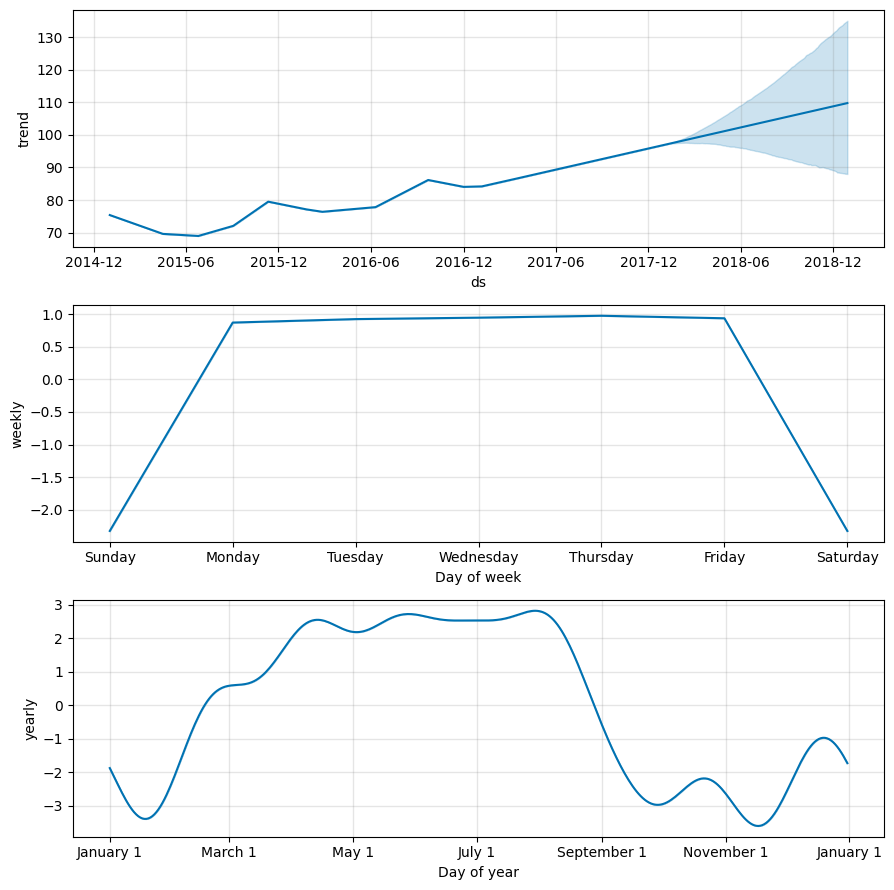

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['PEP_Close'].reset_index().rename(columns={'Date': 'ds', 'PEP_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['PEP_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

Las predicciones para KO indican una continuidad en el crecimiento estable de sus precios, reflejando confianza en el mercado.Pero PEP muestra una tendencia similar pero con mayores variaciones.





---



---



---



---





# Hallazgos Principales

-**Tendencias:** Ambas acciones mostraron una tendencia general al alza durante el período analizado, con Coca-Cola mostrando un crecimiento más estable que PepsiCo.

-**Estacionalidad:** No se encontró evidencia de que factores estacionales desempeñen un papel significativo en las fluctuaciones de los precios.

-**Causalidad:** Las pruebas de Granger no detectaron relaciones causales significativas entre las dos series temporales, lo que sugiere que las acciones no se influyen mutuamente de manera predecible.

-**Predicciones:**
Coca-Cola mostró una proyección de crecimiento constante y estable.
PepsiCo también proyectó un crecimiento, pero con mayores oscilaciones.




# Conclusion

El análisis reveló que, aunque ambas marcas compiten en el mismo sector, no existe relacio significativa entre el comportamiento de sus precios de cierre ajustados. Esto indica que las fluctuaciones de sus acciones están más influenciadas por factores externos, como estrategias empresariales individuales, percepciones del mercado y eventos globales, en lugar de un vínculo directo entre ellas.

El modelo Prophet proporcionó predicciones útiles, pero también mostró las limitaciones inherentes al análisis, especialmente la creciente incertidumbre al alejarse de los datos históricos.

De manera general, el documento analiza el comportamiento de las acciones de Coca-Cola (KO) y PepsiCo (PEP) entre 2015 y 2018, centrándose en identificar patrones, relaciones y tendencias mediante herramientas estadísticas y modelos avanzados de series temporales.